In [1]:
import pandas as pd
import numpy as np
import ta
import plotly.graph_objects as go

In [37]:
df1 = pd.read_csv("DOGE-USD.csv", parse_dates =['Date'], index_col = 'Date')
df1

Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415    6259550.0
2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163    4246520.0
2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201    2231080.0
2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038    3288960.0
2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211    2481270.0
...              ...       ...       ...       ...        ...          ...
2022-08-31  0.061534  0.063333  0.061058  0.061330   0.061330  309748693.0
2022-09-01  0.061336  0.062479  0.060194  0.062372   0.062372  328765413.0
2022-09-02  0.062372  0.062712  0.060947  0.061635   0.061635  273453013.0
2022-09-03       NaN       NaN       NaN       NaN        NaN          NaN
2022-09-04  0.062682  0.062744  0.062667  0.062696   0.062696  297513408.0

[1761 rows x 6 columns]

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2017-11-09 to 2022-09-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1760 non-null   float64
 1   High       1760 non-null   float64
 2   Low        1760 non-null   float64
 3   Close      1760 non-null   float64
 4   Adj Close  1760 non-null   float64
 5   Volume     1760 non-null   float64
dtypes: float64(6)
memory usage: 96.2 KB


In [41]:
df1.describe()

Open         High          Low        Close    Adj Close  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000   
mean      0.059575     0.063096     0.056126     0.059619     0.059619   
std       0.101325     0.109152     0.093695     0.101379     0.101379   
min       0.001046     0.001210     0.001002     0.001038     0.001038   
25%       0.002550     0.002616     0.002500     0.002548     0.002548   
50%       0.003476     0.003603     0.003356     0.003495     0.003495   
75%       0.070633     0.075035     0.068478     0.070657     0.070657   
max       0.687801     0.737567     0.608168     0.684777     0.684777   

             Volume  
count  1.760000e+03  
mean   1.016258e+09  
std    3.563999e+09  
min    1.431720e+06  
25%    2.307671e+07  
50%    8.981855e+07  
75%    6.565853e+08  
max    6.941068e+10

In [39]:
# check for nan values and 
# copy the dataset...
# for column in dif.columns: # shift 1,2,3,4
#     num = list(range(1,duplicate_num+1))
#     new_columns = {}
#     for n in num:
#         new_column_name = f"{column}_{n}"
#         # Assign the shifted values to the new column name in the dictionary
#         new_columns[new_column_name] = df[column].shift(n)
#         df = df.assign(**new_columns)

In [5]:
import matplotlib.pyplot as plt

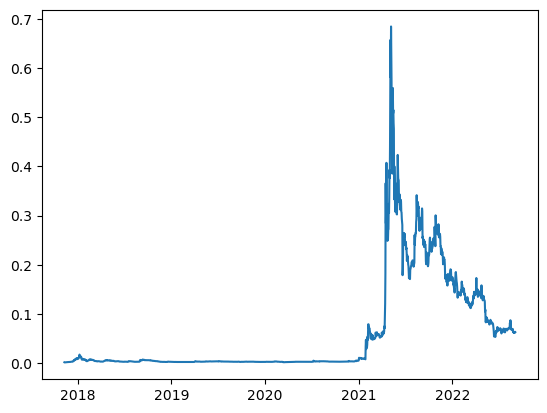

In [6]:
start = '2020'
stop = '2021'
plt.plot(df1['Close'])
plt.show()

## **Efficient Market Hypothesis (EMH):**
The EMH posits that stock prices reflect all available information, making it impossible to consistently achieve above-average returns through prediction based on public information. In other words, if the market is efficient, any attempt to predict price direction from historical prices alone is akin to breaking the “laws” of market efficiency, as it assumes that there’s some undiscovered, exploitable pattern that the market hasn’t already priced in.

**“Breaking” Market Efficiency:** Trying to consistently predict stock prices would imply that the market isn’t fully efficient, as it suggests that exploitable patterns or trends exist that the market hasn’t yet recognized. In reality, according to the EMH, any new pattern or information would be quickly acted upon by market participants, eliminating any consistent opportunity for "beating the market." <br>
<i> **By working with returns, particularly logarithmic returns, we convert price data into a more stationary time series, which is easier to model statistically. Logarithmic returns stabilize variance, making them more statistically manageable and often more meaningful for analysis. Price data on its own tends to exhibit non-stationarity—mean and variance change over time—which violates assumptions underlying many machine learning models.** </i> <br>
Calculate the logarithmic returns and forecast the returns and not the price....=> RESPECT THE LAWS of the financial markets!!!

In [42]:
df1['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

In [61]:
df = df1
def plot_signals(df, start=0, stop=len(df)):
    dfp = df[start:stop]

    fig = go.Figure()
    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=dfp.index,
        Open=dfp['Open'],
        HIgh=dfp['HIgh'],
        Low=dfp['Low'],
        Close=dfp['Close'],
        name='Candlestick'
    ))
    
    # Add Bollinger Bands
    fig.add_trace(go.Scatter(
        x=dfp.index,
        y=dfp['upper_bollinger'],
        mode='lines',
        line=dict(color='blue', width=1.5),
        name='Upper Bollinger Band'
    ))
    
    fig.add_trace(go.Scatter(
        x=dfp.index,
        y=dfp['Lower_bollinger'],
        mode='lines',
        line=dict(color='red', width=1.5),
        name='Lower Bollinger Band'
    ))
    
    # Add Moving Average
    fig.add_trace(go.Scatter(
        x=dfp.index,
        y=dfp['moving_avg'],
        mode='lines',
        line=dict(color='yelLow', width=1.5),
        name='Moving Average'
    ))
    
    # Add 40% lines
    fig.add_trace(go.Scatter(
        x=dfp.index,
        y=dfp['upper_seg_1'],
        mode='lines',
        line=dict(color='green', dash='dash', width=1.5),
        name='Upper 40% Line'
    ))
    
    fig.add_trace(go.Scatter(
        x=dfp.index,
        y=dfp['Lower_seg_1'],
        mode='lines',
        line=dict(color='orange', dash='dash', width=1.5),
        name='Lower 40% Line'
    ))
    
    # Add bearish signals as red dots above candles
    fig.add_trace(go.Scatter(
        x=dfp.index[dfp['signal'] == 1],
        y=dfp['HIgh'][dfp['signal'] == 1] + 1,  # Position above the HIgh of the candle
        mode='markers',
        marker=dict(color='red', size=10),
        name='Bearish Signal'
    ))
    
    # Add Bullish  signals as green dots beLow candles
    fig.add_trace(go.Scatter(
        x=dfp.index[dfp['signal'] == 2],
        y=dfp['Low'][dfp['signal'] == 2] - 1,  # Position beLow the Low of the candle
        mode='markers',
        marker=dict(color='green', size=10),
        name='Bullish Signal'
    ))
    
    
    
    
    # Customize layout to occupy the whole canvas
    fig.update_layout(
        title='Candlestick Chart with Bollinger Bands',
        xaxis_title='Index',
        yaxis_title='Price',
        xaxis_rangeslider_visible=False,
        plot_bgcolor='black',  # Background color for the plot
        paper_bgcolor='black',  # Background color for the entire figure
        margin=dict(l=0, r=0, t=30, b=0),  # Remove all margins
        height=800  # Set the height of the figure
    )
    
    # Show the figure
    fig.show()

# **TECHNICAL ANALYSIS + PRICE ACTION**

In [119]:
def features(df):
    if 'Volume' in df.columns:
        df['VWAP'] = ta.volume.VolumeWeightedAveragePrice(
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            volume=df['Volume'],
            window=14  
        ).volume_weighted_average_price()
    df['body_size'] = abs(df['Close'] - df['Open'])
    ema_9 = ta.trend.EMAIndicator(close=df['Close'], window=9)
    ema_20 = ta.trend.EMAIndicator(close=df['Close'], window=20)
    ema_50 = ta.trend.EMAIndicator(close=df['Close'], window=50)
    df = df.assign(ema_9 = ema_9.ema_indicator())
    df = df.assign(ema_20 = ema_20.ema_indicator())
    df = df.assign(ema_50 = ema_50.ema_indicator())
    aroon = ta.trend.AroonIndicator(high=df['High'], low=df['Low'], window=14).aroon_indicator()
    df = df.assign(aroon=aroon)
    adx = ta.trend.ADXIndicator(high=df['High'],low=df['Low'], close=df['Close'], window=14).adx()
    df = df.assign(adx=adx)
    cci = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14).cci()
    df = df.assign(cci=cci)
    rsi_value = ta.momentum.RSIIndicator(close=df['Close'], window=14)
    df = df.assign(rsi = rsi_value.rsi())
    roc = ta.momentum.ROCIndicator(close=df['Close'], window=5).roc()
    df = df.assign(roc=roc)
    atr = ta.volatility.AverageTrueRange(high=df['High'],
                                         low=df['Low'], 
                                         close=df['Close'],
                                         window=14).average_true_range()
    df = df.assign(atr=atr)
    bol_width = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2).bollinger_wband()
    df = df.assign(bol_width=bol_width)
    bol_above = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2).bollinger_hband_indicator()
    df = df.assign(bol_above=bol_above)
    bol_beLow = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2).bollinger_lband_indicator()
    df = df.assign(bol_beLow=bol_beLow)
    average_candle_size = df['body_size'].rolling(window=14).mean()
    df = df.assign(average_candle_size = average_candle_size)
    
    # final_indicator is to calculate the ratio of the body to the maximum wick
    upper_wick = df['High'] - df[['Open', 'Close']].max(axis = 1)
    Lower_wick = df[['Open', 'Close']].min(axis = 1) - df['Low']
    df['max_wick'] = upper_wick.where(upper_wick > Lower_wick, Lower_wick)
    df['wick_body_ratio'] = df['body_size'] / df['max_wick']
    df['momentum'] = (df['body_size'] >= df['max_wick']).astype(int)
    df = df.replace([np.inf, -np.inf], 0)
    df.dropna(inplace=True)
    return df

In [120]:
df1['High']

Date
2018-04-06    0.002737
2018-04-07    0.002865
2018-04-08    0.002907
2018-04-09    0.002929
2018-04-10    0.003073
                ...   
2022-08-30    0.064408
2022-08-31    0.063333
2022-09-01    0.062479
2022-09-02    0.062712
2022-09-04    0.062744
Name: High, Length: 1612, dtype: float64

In [98]:
df1 = features(df1)
df1.head()

Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2018-04-06  0.002715  0.002737  0.002614  0.002670   0.002670   2848290.0   
2018-04-07  0.002682  0.002865  0.002669  0.002802   0.002802   3034220.0   
2018-04-08  0.002786  0.002907  0.002786  0.002843   0.002843   3683180.0   
2018-04-09  0.002855  0.002929  0.002724  0.002763   0.002763   4827250.0   
2018-04-10  0.002759  0.003073  0.002740  0.003043   0.003043  10212100.0   

            Log_Returns      VWAP  body_size     ema_9  ...        rsi  \
Date                                                    ...              
2018-04-06    -0.016345  0.003001   0.000045  0.002849  ...  28.163396   
2018-04-07     0.048255  0.002949   0.000120  0.002839  ...  33.240116   
2018-04-08     0.014526  0.002913   0.000057  0.002840  ...  34.781819   
2018-04-09    -0.028543  0.002866   0.000092  0.002825  ...  33.172104   
2018-04-10     0.096527  0.002855   0.000284  0.002868  ...  43.098141   

                  roc       atr  bol_width  bol_above  bol_beLow  \
Date                                                               
2018-04-06  -1.802133  0.000297  45.165769        0.0        0.0   
2018-04-07   0.178763  0.000290  46.365588        0.0        0.0   
2018-04-08  -4.597315  0.000278  46.405783        0.0        0.0   
2018-04-09  -0.252708  0.000273  44.734897        0.0        0.0   
2018-04-10  12.122329  0.000277  41.141404        0.0        0.0   

            average_candle_size  max_wick  wick_body_ratio  momentum  
Date                                                                  
2018-04-06             0.000110  0.000056         0.803571         0  
2018-04-07             0.000118  0.000063         1.904762         1  
2018-04-08             0.000119  0.000064         0.890625         0  
2018-04-09             0.000110  0.000074         1.243243         1  
2018-04-10             0.000121  0.000030         9.466667         1  

[5 rows x 25 columns]

In [99]:
# days_into_future = 1
# days_into_futre = -days_into_future
# predicted_returns = df['Log_Returns'].shift(days_into_future)
# df = df.assign(target = predicted_returns)

In [100]:
df1.dropna(inplace=True)

# random forest Regressor for the forecasting the log returns

In [101]:
x = df1.drop('Log_Returns', axis =1)
y = df1.Log_Returns
x.shape, y.shape

((1612, 24), (1612,))

In [102]:
# split without using train_test_split
split = int(0.8 * len(df1))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1289, 24), (1289,), (323, 24), (323,))

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [104]:
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=1)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [106]:
# Predict and evaluate the model
y_pred = rf_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}, Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.0019380784415188026, Root Mean Squared Error: 0.04402361231792324


## Plot the real values against the predicted values

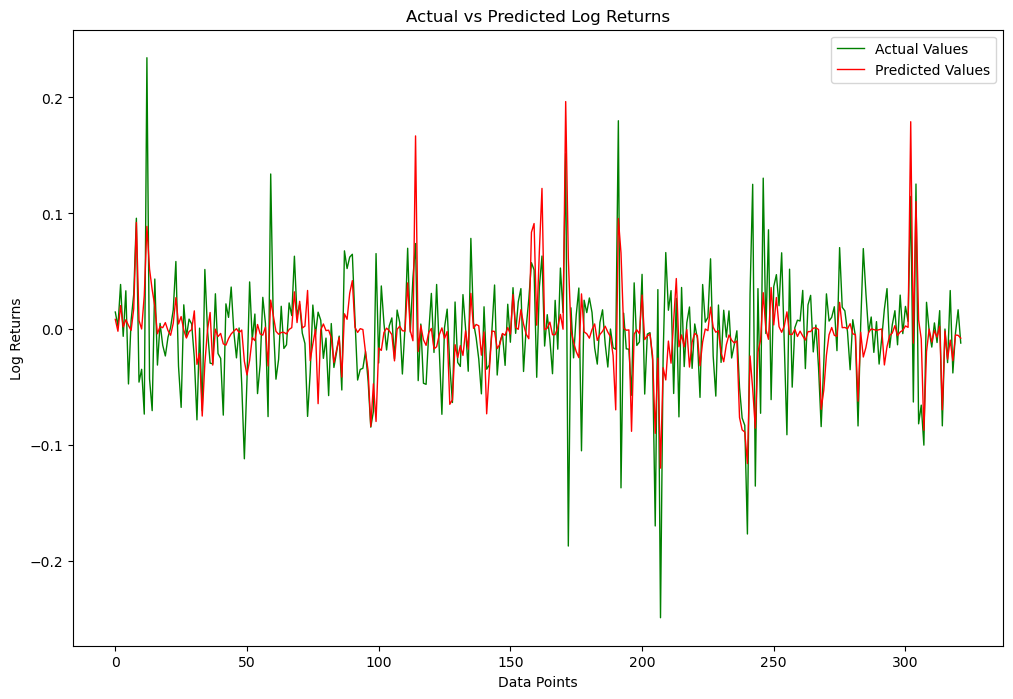

In [108]:
start = 0
stop = -1
plt.figure(figsize=(12, 8))
plt.plot(y_test.values[start:stop], label='Actual Values', color='green', linewidth=1)
plt.plot(y_pred[start:stop], label='Predicted Values', color='red',linewidth=1)
plt.xlabel("Data Points")
plt.ylabel("Log Returns")
plt.title("Actual vs Predicted Log Returns")
plt.legend()
plt.show()

## **Dogecoin for Day Trading PART B**

using 15min/1hr timeframe, we determine whether dogecoin will go upp for the next predicted amount of candles or it will go down...

In [126]:
# df2 = pd.read_csv("DOGEUSDT_H1.csv")
# df2
column_names = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
df2 = pd.read_csv("DOGEUSDT_H1.csv", names=column_names,parse_dates = ['Date'], index_col = 'Date')
df2.head()

Open    High     Low   Close  Adj Close  Volume
Date                                                                  
2019-07-05 12:00:00  0.0045  0.0046  0.0038  0.0039  949430724     NaN
2019-07-05 13:00:00  0.0039  0.0039  0.0038  0.0038  159004267     NaN
2019-07-05 14:00:00  0.0038  0.0039  0.0038  0.0038  105517060     NaN
2019-07-05 15:00:00  0.0038  0.0039  0.0037  0.0037  100804728     NaN
2019-07-05 16:00:00  0.0037  0.0037  0.0036  0.0037  120261079     NaN

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46687 entries, 2019-07-05 12:00:00 to 2024-11-05 16:00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       46687 non-null  float64
 1   High       46687 non-null  float64
 2   Low        46687 non-null  float64
 3   Close      46687 non-null  float64
 4   Adj Close  46687 non-null  int64  
 5   Volume     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 2.5 MB


In [128]:
df2 = df2.drop('Volume', axis=1)

In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46687 entries, 2019-07-05 12:00:00 to 2024-11-05 16:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       46687 non-null  float64
 1   High       46687 non-null  float64
 2   Low        46687 non-null  float64
 3   Close      46687 non-null  float64
 4   Adj Close  46687 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 MB


In [125]:
df2 = features(df2)
df2.head()

Open    High     Low   Close  Adj Close  body_size  \
Date                                                                        
2019-07-07 16:00:00  0.0035  0.0035  0.0034  0.0035   19636031     0.0000   
2019-07-07 17:00:00  0.0035  0.0037  0.0035  0.0036   45397041     0.0001   
2019-07-07 18:00:00  0.0036  0.0036  0.0035  0.0035   41527231     0.0001   
2019-07-07 19:00:00  0.0035  0.0036  0.0035  0.0035   11614218     0.0000   
2019-07-07 20:00:00  0.0035  0.0036  0.0035  0.0036   24682988     0.0001   

                        ema_9    ema_20    ema_50      aroon  ...        rsi  \
Date                                                          ...              
2019-07-07 16:00:00  0.003499  0.003510  0.003588  28.571429  ...  44.065871   
2019-07-07 17:00:00  0.003520  0.003518  0.003588  92.857143  ...  61.702368   
2019-07-07 18:00:00  0.003516  0.003517  0.003585  92.857143  ...  46.061571   
2019-07-07 19:00:00  0.003512  0.003515  0.003581   7.142857  ...  46.061571   
2019-07-07 20:00:00  0.003530  0.003523  0.003582   7.142857  ...  58.316059   

                          roc       atr  bol_width  bol_above  bol_beLow  \
Date                                                                       
2019-07-07 16:00:00  0.000000  0.000057   4.098381        0.0        0.0   
2019-07-07 17:00:00  2.857143  0.000067   4.395505        1.0        0.0   
2019-07-07 18:00:00  0.000000  0.000069   3.614032        0.0        0.0   
2019-07-07 19:00:00  0.000000  0.000071   3.614032        0.0        0.0   
2019-07-07 20:00:00  2.857143  0.000073   3.418803        1.0        0.0   

                     average_candle_size  max_wick  wick_body_ratio  momentum  
Date                                                                           
2019-07-07 16:00:00             0.000000    0.0001              0.0         0  
2019-07-07 17:00:00             0.000007    0.0001              1.0         0  
2019-07-07 18:00:00             0.000014    0.0000              0.0         1  
2019-07-07 19:00:00             0.000014    0.0001              0.0         0  
2019-07-07 20:00:00             0.000021    0.0000              0.0         1  

[5 rows x 22 columns]

In [140]:
df2['Log_Returns'] = np.log(df2['Close'] / df2['Close'].shift(1))

In [141]:
days_into_future = 1
days_into_futre = -days_into_future
predicted_returns = df2['Log_Returns'].shift(days_into_future)
df2 = df2.assign(target = predicted_returns)
df2.dropna(inplace=True)

In [146]:
df2.target

Date
2019-07-05 14:00:00   -0.025975
2019-07-05 15:00:00    0.000000
2019-07-05 16:00:00   -0.026668
2019-07-05 17:00:00    0.000000
2019-07-05 18:00:00   -0.027399
                         ...   
2024-11-05 12:00:00    0.015276
2024-11-05 13:00:00   -0.010551
2024-11-05 14:00:00    0.007631
2024-11-05 15:00:00    0.035051
2024-11-05 16:00:00   -0.015363
Name: target, Length: 46685, dtype: float64

In [147]:
df2['target'] = np.where(np.sign(df2['target']) > 0, 1, 0)
df2.target.value_counts()

target
0    30271
1    16414
Name: count, dtype: int64

In [148]:
x = df2.drop('target', axis =1)
y = df2.target
x.shape, y.shape

((46685, 6), (46685,))

In [149]:
# split without using train_test_split
split = int(0.8 * len(df2))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37348, 6), (37348,), (9337, 6), (9337,))

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1) # keep it 100 for faster execution
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc